In [8]:
import pandas as pd

products = pd.read_csv('products.csv')

# See exact column names
print(products.columns)



Index(['ProductID', 'ProductName', 'Price', 'CategoryID', 'Class',
       'ModifyDate', 'Resistant', 'IsAllergic', 'VitalityDays'],
      dtype='object')


In [14]:
import os
os.chdir(r"C:\Users\varsh\Untitled Folder 1")

In [15]:
os.listdir()


['.ipynb_checkpoints',
 'categories.csv',
 'cities.csv',
 'clean_categories.csv',
 'clean_cities.csv',
 'clean_countries.csv',
 'clean_customers.csv',
 'clean_employees.csv',
 'clean_products.csv',
 'countries.csv',
 'customers.csv',
 'employees.csv',
 'products.csv',
 'sales.csv']

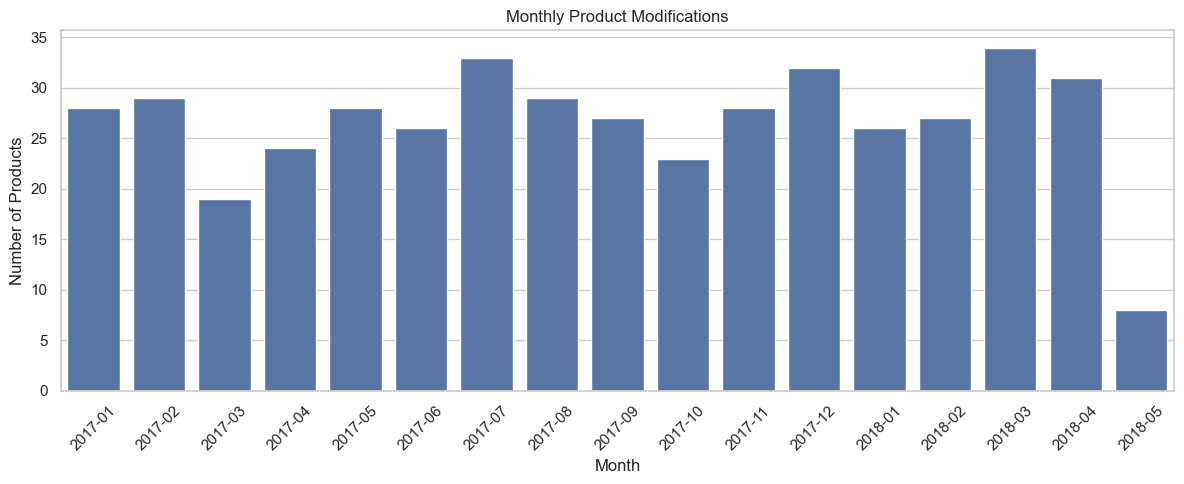

In [19]:
#Monthly Product Count – BAR CHART
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 5)

# Load products dataset
df = pd.read_csv('products.csv')

# Convert ModifyDate to datetime
df['ModifyDate'] = pd.to_datetime(df['ModifyDate'], errors='coerce')

# Remove invalid dates
df = df.dropna(subset=['ModifyDate'])

# Monthly product count
monthly_products = (
    df.groupby(df['ModifyDate'].dt.to_period('M'))
      .size()
      .reset_index(name='ProductCount')
)

# Convert period to string for plotting
monthly_products['ModifyDate'] = monthly_products['ModifyDate'].astype(str)

# BAR CHART
sns.barplot(
    data=monthly_products,
    x='ModifyDate',
    y='ProductCount'
)

plt.title('Monthly Product Modifications')
plt.xlabel('Month')
plt.ylabel('Number of Products')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


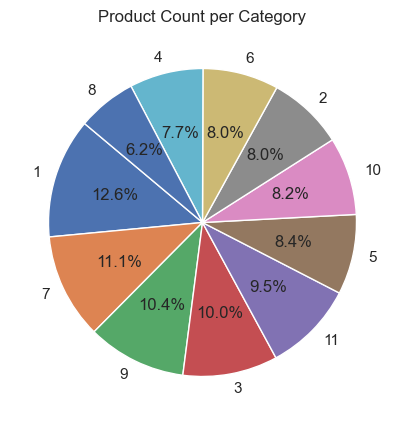

In [17]:
#categoies.csv Visualization
import pandas as pd
import matplotlib.pyplot as plt

# Load Categories and Products
categories = pd.read_csv('categories.csv')
products = pd.read_csv('products.csv')

# Count products per category
category_counts = products['CategoryID'].value_counts()

# Pie chart: Product count per category
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Product Count per Category')
plt.show()


In [25]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10,6)

# Load Cities
cities = pd.read_csv('cities.csv')

# Drop duplicates
cities.drop_duplicates(inplace=True)

# Bar chart: Top 10 cities by CustomerCount (if exists)
if 'CustomerCount' in cities.columns:
    sns.barplot(x='City', y='CustomerCount', data=cities.sort_values('CustomerCount', ascending=False).head(10))
    plt.xticks(rotation=45)
    plt.title('Top 10 Cities by Customer Count')
    plt.show()


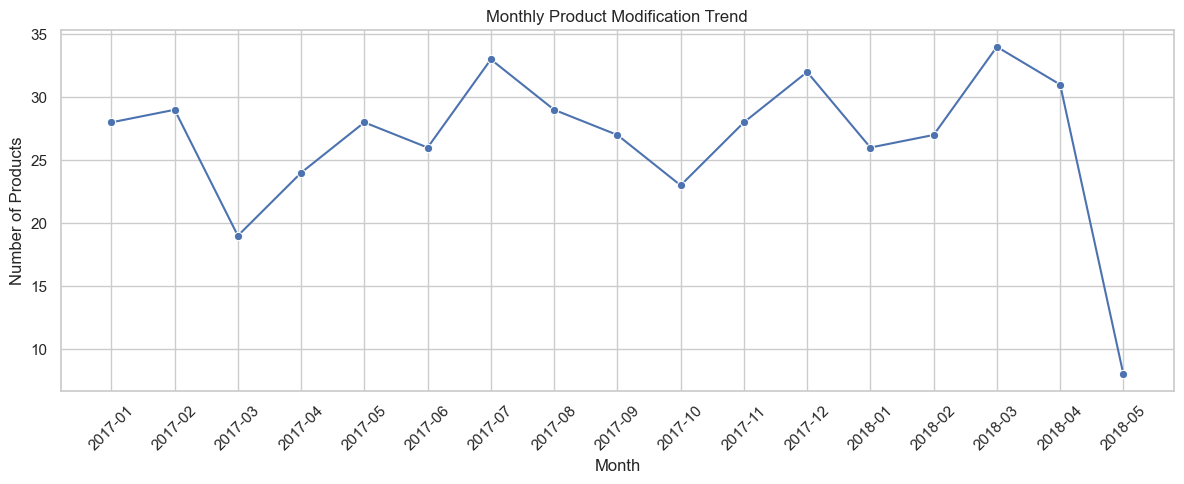

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 5)

# Load products dataset
df = pd.read_csv('products.csv')

# Convert ModifyDate to datetime
df['ModifyDate'] = pd.to_datetime(df['ModifyDate'], errors='coerce')

# Remove invalid dates
df = df.dropna(subset=['ModifyDate'])

# Create monthly trend
monthly_trend = (
    df.groupby(df['ModifyDate'].dt.to_period('M'))
      .size()
      .reset_index(name='ProductCount')
)

# Convert period to string for plotting
monthly_trend['ModifyDate'] = monthly_trend['ModifyDate'].astype(str)

# LINE CHART
sns.lineplot(
    data=monthly_trend,
    x='ModifyDate',
    y='ProductCount',
    marker='o'
)

plt.title('Monthly Product Modification Trend')
plt.xlabel('Month')
plt.ylabel('Number of Products')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


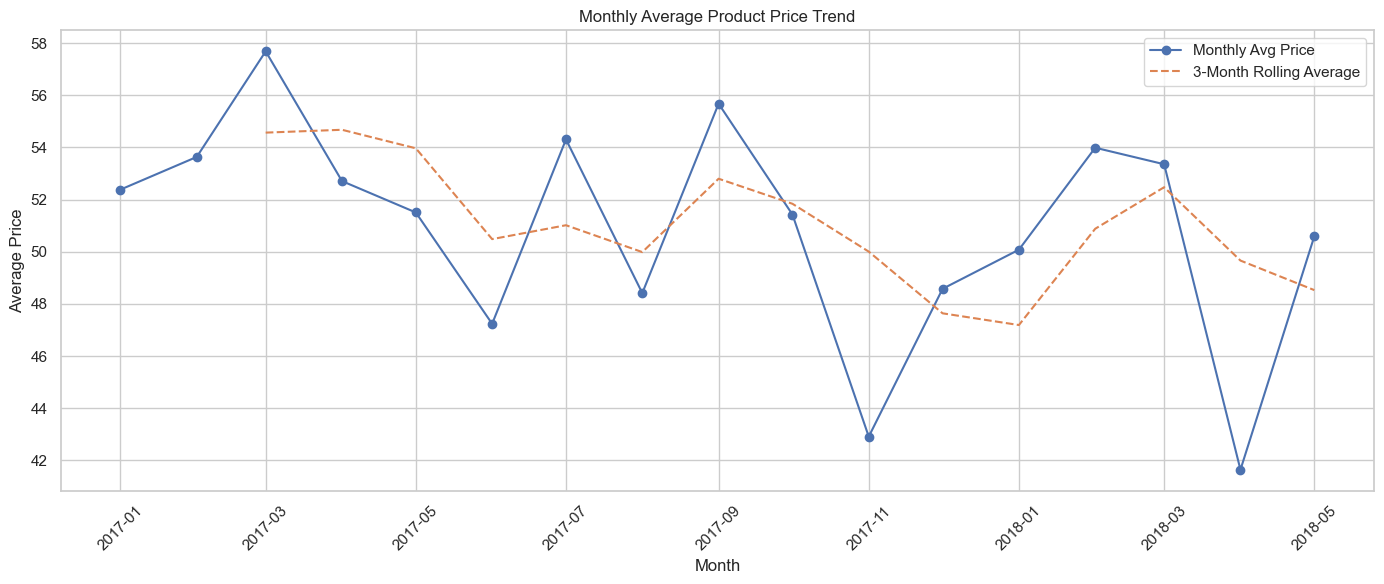

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (14, 6)

# Load products dataset
df = pd.read_csv('products.csv')

# Convert ModifyDate to datetime
df['ModifyDate'] = pd.to_datetime(df['ModifyDate'], errors='coerce')

# Remove invalid dates
df = df.dropna(subset=['ModifyDate'])

# Fill missing prices (safety)
df['Price'] = df['Price'].fillna(df['Price'].mean())

# Monthly average price
monthly_price = (
    df.groupby(df['ModifyDate'].dt.to_period('M'))['Price']
      .mean()
      .reset_index()
)

# Convert period to timestamp (better for line charts)
monthly_price['ModifyDate'] = monthly_price['ModifyDate'].dt.to_timestamp()

# Rolling average (3-month smoothing)
monthly_price['RollingAvgPrice'] = (
    monthly_price['Price'].rolling(window=3).mean()
)

# LINE CHART – Actual trend
plt.plot(
    monthly_price['ModifyDate'],
    monthly_price['Price'],
    marker='o',
    label='Monthly Avg Price'
)

# LINE CHART – Smoothed trend
plt.plot(
    monthly_price['ModifyDate'],
    monthly_price['RollingAvgPrice'],
    linestyle='--',
    label='3-Month Rolling Average'
)

plt.title('Monthly Average Product Price Trend')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
